In [17]:
import torch
import urllib
from IPython.display import Image
import os
import random
import json
import pandas as pd


In [18]:
# Download dataset
from Data.coco_download import DataDownloader
dataset_folder = './Data/COCO'
dataDownloader = DataDownloader(dataset_folder)
dataDownloader.download_all()
print("Something")

COCO folder is at ./Data/COCO
File is downloaded at./Data/COCO/annotation/train/v2_Annotations_Train_mscoco.zip
File is downloaded at./Data/COCO/annotation/val/v2_Annotations_Val_mscoco.zip
File is downloaded at./Data/COCO/question/train/v2_Questions_Train_mscoco.zip
File is downloaded at./Data/COCO/question/val/v2_Questions_Val_mscoco.zip
File is downloaded at./Data/COCO/question/test/v2_Questions_Test_mscoco.zip
File is downloaded at./Data/COCO/image/train/train2014.zip
File is downloaded at./Data/COCO/image/val/val2014.zip
File is downloaded at./Data/COCO/image/test/test2015.zip


./Data/COCO/image/train/train2014/COCO_train2014_000000099162.jpg


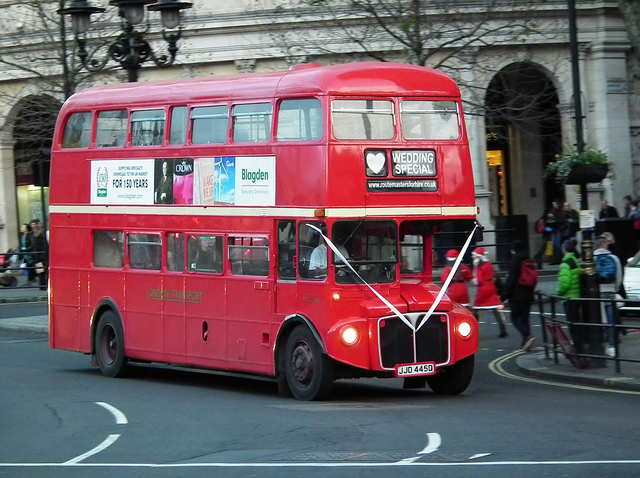

In [15]:
# Display Sampler
def random_image(image_folder:str) -> str:
    images = os.listdir(image_folder)
    images_count = len(images)
    random_num = random.randrange(0, images_count)
    random_image_path = os.path.join(image_folder, images[random_num])
    return random_image_path

# Display specific image
def show_image(image_id:str, train_folder_path:str) -> str:
    image_id_length = len(image_id)
    image_id_full = 'COCO_train2014_' + '0'*(12 - image_id_length) + image_id + '.jpg'
    image_path = os.path.join(train_folder_path, image_id_full)
    return image_path

train_folder_path = "./Data/COCO/image/train/train2014"
random_train_image_path = random_image(train_folder_path)
Image(random_train_image_path)

In [4]:
# Load Annotations and questions
annotations_train_path = os.path.join(dataset_folder, 'annotation', 'train', 'v2_mscoco_train2014_annotations.json')
annotations_train_file = open(annotations_train_path)
annotations_train = json.load(annotations_train_file)
annotations_train_file.close()

questions_train_path = './Data/COCO/question/train/v2_OpenEnded_mscoco_train2014_questions.json'
questions_train_file = open(questions_train_path)
questions_train = json.load(questions_train_file)
questions_train_file.close()

In [15]:
# Make dataframe
# Structure as {image_id, question_id, question, question_type, answer_type, multiple_choice_answer, [answers 1, ..., answer 10]}
df_test = pd.DataFrame({"image_id":[], "question_id":[], "question":[], "question_type":[], "answer_type":[], "multiple_choice_answer":[], "answers":[]})
record = {
    "image_id":101, 
    "question_id":101, 
    "question":"Test question",
    "question_type":"Yes or No",
    "answer_type":"Yes or No",
    "multiple_choice_answer":"Yes yes and yes",
    "answers":["Yes", "Yes", "yes", "No"]
}
df_test.append(record, ignore_index=True)

/var/folders/lz/v203z6rj653bp_b9_v3sr17h0000gn/T/ipykernel_32526/932153410.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test.append(record, ignore_index=True)


,image_id,question_id,question,question_type,answer_type,multiple_choice_answer,answers
0,101.0,101.0,Test question,Yes or No,Yes or No,Yes yes and yes,"[Yes, Yes, yes, No]"


In [ ]:
# Make dataframe
df = pd.DataFrame({"image_id":[], "question_id":[], "question":[], "question_type":[], "answer_type":[], "multiple_choice_answer":[], "answers":[]})
annotation_length = len(annotations_train['annotations'])
question_length = len(questions_train['questions'])
if annotation_length != question_length:
    raise ValueError
for idx in range(0, annotation_length):
    annotation = annotations_train['annotations'][idx]
    question = questions_train['questions'][idx]
    if annotation['image_id'] != question['image_id']:
        raise ValueError
    record = {
    "image_id": annotation['image_id'],
    "question_id":annotation['image_id'], 
    "question":question['question'],
    "question_type":annotation['question_type'],
    "answer_type":annotation['answer_type'],
    "multiple_choice_answer":annotation['multiple_choice_answer'],
    "answers":[answer for answer in annotation['answers']]
    }
    df.append(record, ignore_index=True)

In [6]:
len(annotations_train['annotations'])

443757

In [7]:
len(questions_train['questions'])

443757

In [10]:
annotations_train['annotations'][200003]

{'answer_type': 'other',
 'multiple_choice_answer': 'summer',
 'answers': [{'answer': 'summer',
   'answer_confidence': 'maybe',
   'answer_id': 1},
  {'answer': 'summer', 'answer_confidence': 'maybe', 'answer_id': 2},
  {'answer': 'spring', 'answer_confidence': 'yes', 'answer_id': 3},
  {'answer': 'summer', 'answer_confidence': 'yes', 'answer_id': 4},
  {'answer': 'summer', 'answer_confidence': 'yes', 'answer_id': 5},
  {'answer': 'summer', 'answer_confidence': 'maybe', 'answer_id': 6},
  {'answer': 'spring', 'answer_confidence': 'maybe', 'answer_id': 7},
  {'answer': 'spring', 'answer_confidence': 'maybe', 'answer_id': 8},
  {'answer': 'spring', 'answer_confidence': 'yes', 'answer_id': 9},
  {'answer': 'summer', 'answer_confidence': 'yes', 'answer_id': 10}],
 'image_id': 56499,
 'question_type': 'what',
 'question_id': 56499011}

In [8]:
questions_train['questions'][0]

{'image_id': 458752,
 'question': 'What is this photo taken looking through?',
 'question_id': 458752000}

In [4]:
# Set the device
if torch.cuda.is_available():
    device = 'cuda:0'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'

print(device)

cuda:0


In [4]:
d = urllib.request.urlopen("http://images.cocodataset.org/zips/val2014.zip")
print(d.info())


x-amz-id-2: +Tq9LTBmIvXMFqek2AEipGds6GmvWcyu7ouJVRihJQim/qOyCSwLNNmYuOqPes5iq8O5dQZPCHA=
x-amz-request-id: CN2T0R759AYCSWN2
Date: Sun, 06 Nov 2022 02:11:57 GMT
Last-Modified: Wed, 11 Jul 2018 05:04:19 GMT
ETag: "3925cc4d50eb68d47bf2d6324a012d20-793"
x-amz-version-id: null
Accept-Ranges: bytes
Content-Type: application/zip
Server: AmazonS3
Content-Length: 6645013297
Connection: close




In [16]:
test_list = [1, 2, 3, 4, 5]
test_list_b = [i for i in test_list]
print(test_list_b)

[1, 2, 3, 4, 5]


./Data/COCO/image/train/train2014/COCO_train2014_000000056499.jpg


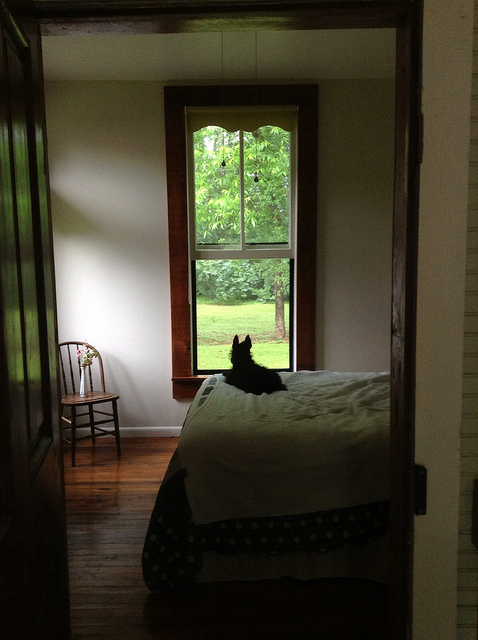

In [16]:
def show_image(image_id:str, train_folder_path:str):
    image_id_length = len(image_id)
    image_id_full = 'COCO_train2014_' + '0'*(12 - image_id_length) + image_id + '.jpg'
    image_path = os.path.join(train_folder_path, image_id_full)
    return image_path

a = show_image('56499', train_folder_path)
print(a)
Image(a)